<a href="https://colab.research.google.com/github/Binabrata/Quantum-Computing/blob/main/Deutsch-Jozsa%20Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install qiskit
!pip install qiskit-aer
!pip install pylatexenc

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 33.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 39.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 58.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=7af580663808446cddd5f3ec4d9859b1871f461f425f012008364e093b4d3a51
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc


In [ ]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

## Constant Oracle

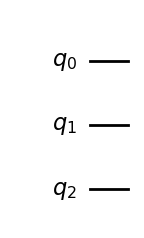

In [ ]:
# set the length of the n-bit input register string.
n = 2

const_oracle = QuantumCircuit(n+1)

output = np.random.randint(2) # Randomly generates 0 and 1 (Random Flips)
if output == 1:
    const_oracle.x(n)

const_oracle.draw('mpl')

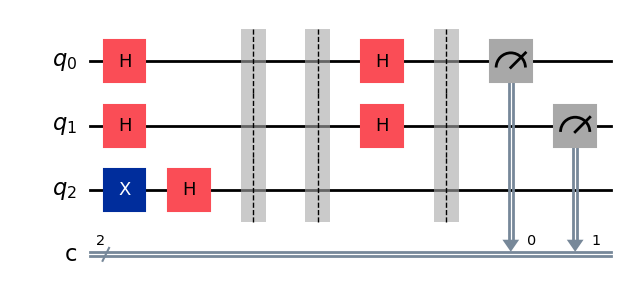

In [ ]:
dj_circuit = QuantumCircuit(n+1, n)

# Apply H-gates
for qubit in range(n):
    dj_circuit.h(qubit)

# Put qubit in state |->
dj_circuit.x(n)
dj_circuit.h(n)
dj_circuit.barrier()

# Add oracle
dj_circuit.compose(const_oracle, inplace=True)
dj_circuit.barrier()

# Repeat H-gates
for qubit in range(n):
    dj_circuit.h(qubit)
dj_circuit.barrier()

# Measure
for i in range(n):
    dj_circuit.measure(i, i)

# Display circuit
dj_circuit.draw('mpl')


Total counts are: {'00': 1024}


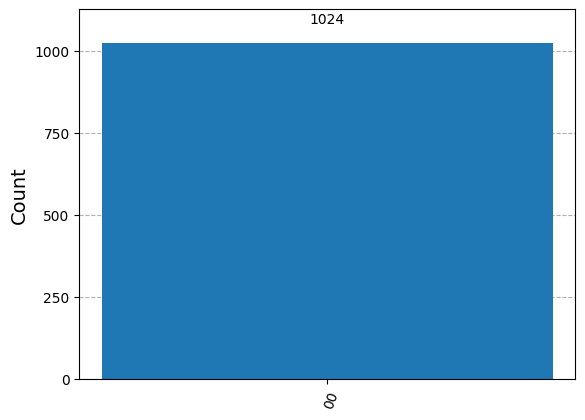

In [ ]:
# Test the Constant Oracle

from qiskit import transpile

backend = Aer.get_backend('qasm_simulator')
compiled_circuit = transpile(dj_circuit, backend)

# Grab results from the job
result = backend.run(compiled_circuit).result()

# Returns counts
counts = result.get_counts(compiled_circuit)
print("\nTotal counts are:",counts)

# Plot a histogram
plot_histogram(counts)

## Constant Oracle - General Function

In [ ]:
def dj_oracle_const(n):
    # Creates a QuantumCircuit object to return circuit has n+1 qubits: the size of the input, plus one output qubit
    oracle_qc = QuantumCircuit(n+1)

    # First decide what the fixed output of the oracle will be (either always 0 or always 1)
    output = np.random.randint(2)
    if output == 1:
        oracle_qc.x(n)

    oracle_gate_const = oracle_qc.to_gate()
    oracle_gate_const.name = "Oracle Constant" # To show when we display the circuit
    return oracle_gate_const

In [ ]:
def dj_algorithm(dj_oracle_const,n):
    dj_circuit = QuantumCircuit(n+1, n)
    # Set up the output qubit:
    dj_circuit.x(n)
    dj_circuit.h(n)
    # And set up the input register:
    for qubit in range(n):
        dj_circuit.h(qubit)
    # Append the oracle gate to our circuit:
    dj_circuit.append(dj_oracle_const, range(n+1))
    # Finally, perform the H-gates again and measure:
    for qubit in range(n):
        dj_circuit.h(qubit)

    for i in range(n):
        dj_circuit.measure(i, i)

    return dj_circuit

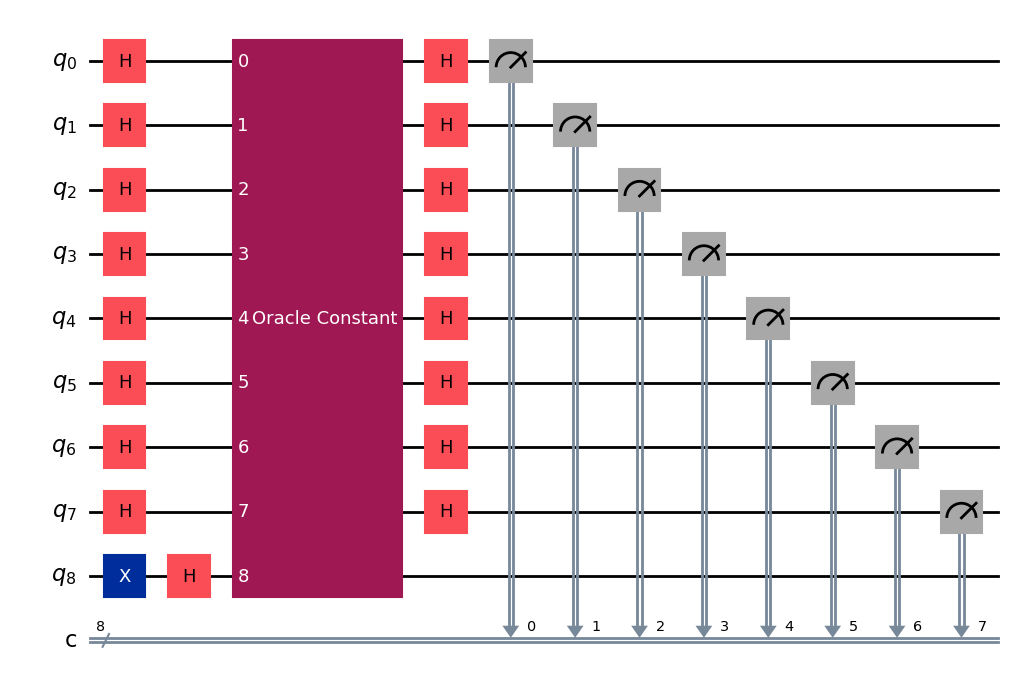

In [ ]:
n = 8
oracle_gate_const = dj_oracle_const(n)
dj_circuit = dj_algorithm(oracle_gate_const, n)
dj_circuit.draw('mpl')


Total counts are: {'00000000': 1024}


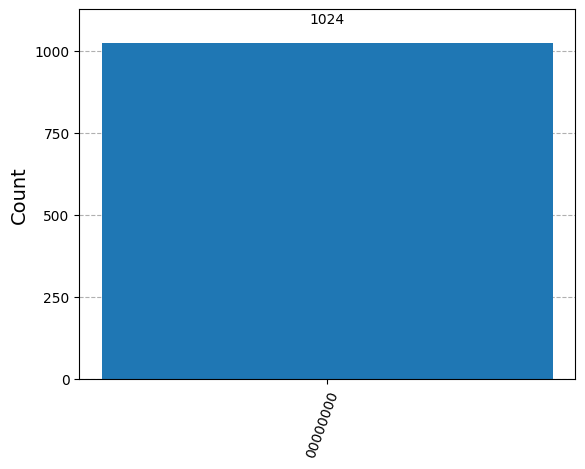

In [ ]:
# Test the Constant Oracle - General Function

from qiskit import transpile

backend = Aer.get_backend('qasm_simulator')
compiled_circuit = transpile(dj_circuit, backend)

# Grab results from the job
result = backend.run(compiled_circuit).result()

# Returns counts
counts = result.get_counts(compiled_circuit)
print("\nTotal counts are:",counts)

# Plot a histogram
plot_histogram(counts)

## Balanced Oracle

In [ ]:
# set the length of the n-bit input string.
n = 2

### For Inputs |00>

/usr/local/lib/python3.10/dist-packages/qiskit/visualization/circuit/matplotlib.py:269: UserWarning: Style JSON file 'iqx.json' not found in any of these locations: /usr/local/lib/python3.10/dist-packages/qiskit/visualization/circuit/styles/iqx.json, iqx.json. Will use default style.
  self._style, def_font_ratio = load_style(self._style)


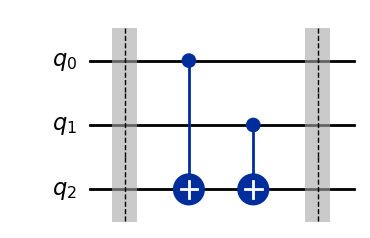

In [ ]:
balanced_oracle = QuantumCircuit(n+1)
b_str = "00"

# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

# Use barrier as divider
balanced_oracle.barrier()

# Controlled-NOT gates
for qubit in range(n):
    balanced_oracle.cx(qubit, n)

balanced_oracle.barrier()

# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

# Show oracle
balanced_oracle.draw('mpl', style='iqx')

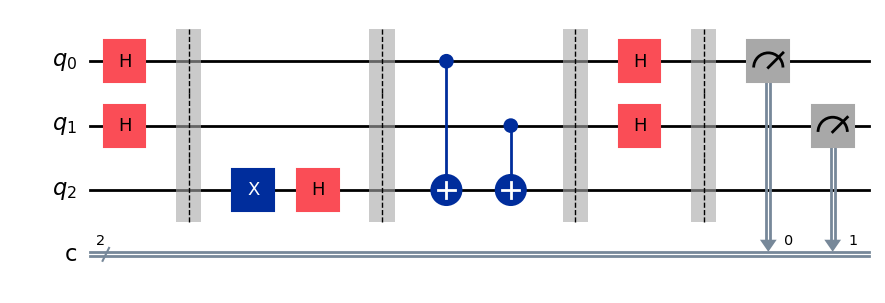

In [ ]:
# The Deutsch Jozsa  Full Quantum Circuit
dj_circuit = QuantumCircuit(n+1, n)

# Apply H-gates
for qubit in range(n):
    dj_circuit.h(qubit)
dj_circuit.barrier()

# Put qubit in state |->
dj_circuit.x(n)
dj_circuit.h(n)

# Add oracle
dj_circuit.compose(balanced_oracle, inplace=True)

# Repeat H-gates
for qubit in range(n):
    dj_circuit.h(qubit)
dj_circuit.barrier()

# Measure
for i in range(n):
    dj_circuit.measure(i, i)

# Display circuit
dj_circuit.draw('mpl', style='iqx')


Total counts are: {'11': 1024}


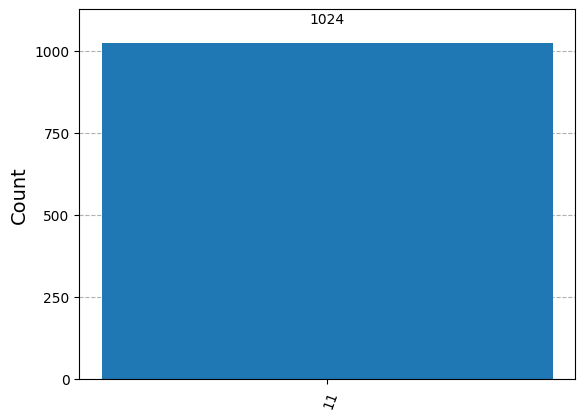

In [ ]:
# Test the Balanced Oracle

from qiskit import transpile

backend = Aer.get_backend('qasm_simulator')
compiled_circuit = transpile(dj_circuit, backend)

# Grab results from the job
result = backend.run(compiled_circuit).result()

# Returns counts
counts = result.get_counts(compiled_circuit)
print("\nTotal counts are:",counts)

# Plot a histogram
plot_histogram(counts)

### For Inputs |01>

/usr/local/lib/python3.10/dist-packages/qiskit/visualization/circuit/matplotlib.py:269: UserWarning: Style JSON file 'iqx.json' not found in any of these locations: /usr/local/lib/python3.10/dist-packages/qiskit/visualization/circuit/styles/iqx.json, iqx.json. Will use default style.
  self._style, def_font_ratio = load_style(self._style)


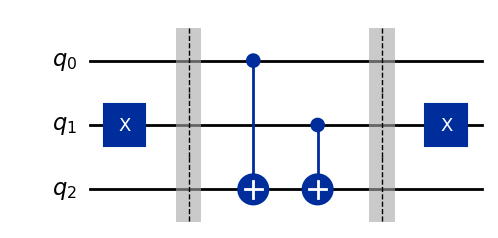

In [ ]:
balanced_oracle = QuantumCircuit(n+1)
b_str = "01"

# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

# Use barrier as divider
balanced_oracle.barrier()

# Controlled-NOT gates
for qubit in range(n):
    balanced_oracle.cx(qubit, n)

balanced_oracle.barrier()

# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

# Show oracle
balanced_oracle.draw('mpl', style='iqx')

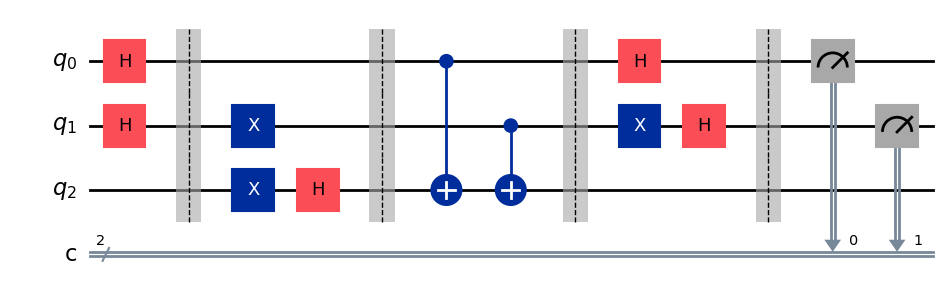

In [ ]:
# The Deutsch Jozsa  Full Quantum Circuit
dj_circuit = QuantumCircuit(n+1, n)

# Apply H-gates
for qubit in range(n):
    dj_circuit.h(qubit)
dj_circuit.barrier()

# Put qubit in state |->
dj_circuit.x(n)
dj_circuit.h(n)

# Add oracle
dj_circuit.compose(balanced_oracle, inplace=True)

# Repeat H-gates
for qubit in range(n):
    dj_circuit.h(qubit)
dj_circuit.barrier()

# Measure
for i in range(n):
    dj_circuit.measure(i, i)

# Display circuit
dj_circuit.draw('mpl', style='iqx')


Total counts are: {'11': 1024}


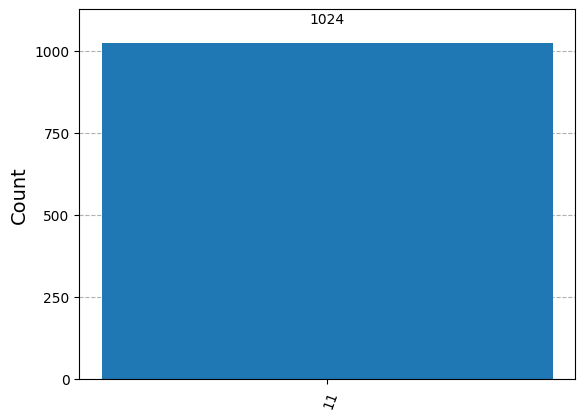

In [ ]:
# Test the Balanced Oracle

from qiskit import transpile

backend = Aer.get_backend('qasm_simulator')
compiled_circuit = transpile(dj_circuit, backend)

# Grab results from the job
result = backend.run(compiled_circuit).result()

# Returns counts
counts = result.get_counts(compiled_circuit)
print("\nTotal counts are:",counts)

# Plot a histogram
plot_histogram(counts)

## For Inputs |10>

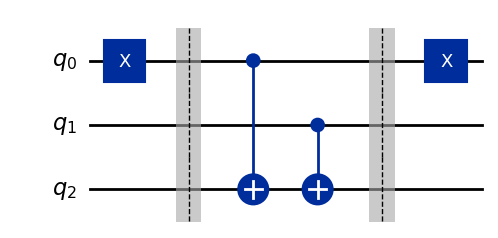

In [ ]:
balanced_oracle = QuantumCircuit(n+1)
b_str = "10"

# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

# Use barrier as divider
balanced_oracle.barrier()

# Controlled-NOT gates
for qubit in range(n):
    balanced_oracle.cx(qubit, n)

balanced_oracle.barrier()

# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

# Show oracle
balanced_oracle.draw('mpl')

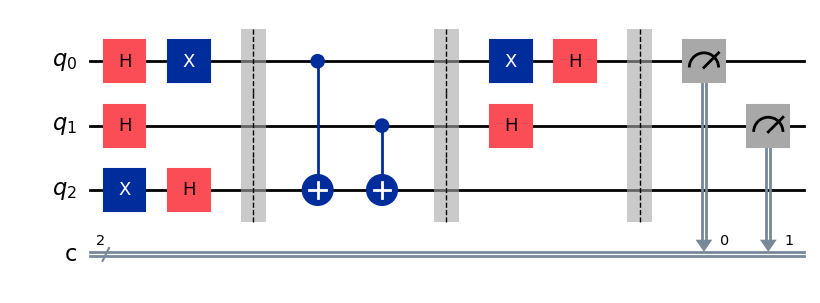

In [ ]:
# The Deutsch Jozsa  Full Quantum Circuit
dj_circuit = QuantumCircuit(n+1, n)

# Apply H-gates
for qubit in range(n):
    dj_circuit.h(qubit)

# Put qubit in state |->
dj_circuit.x(n)
dj_circuit.h(n)

# Add oracle
dj_circuit.compose(balanced_oracle, inplace=True)

# Repeat H-gates
for qubit in range(n):
    dj_circuit.h(qubit)
dj_circuit.barrier()

# Measure
for i in range(n):
    dj_circuit.measure(i, i)

# Display circuit
dj_circuit.draw('mpl')


Total counts are: {'11': 1024}


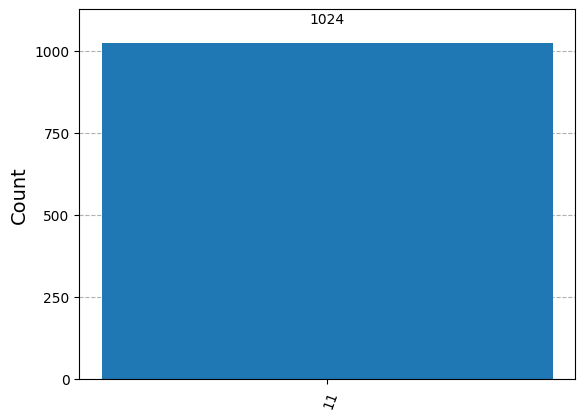

In [ ]:
# Test the Balanced Oracle

from qiskit import transpile

backend = Aer.get_backend('qasm_simulator')
compiled_circuit = transpile(dj_circuit, backend)

# Grab results from the job
result = backend.run(compiled_circuit).result()

# Returns counts
counts = result.get_counts(compiled_circuit)
print("\nTotal counts are:",counts)

# Plot a histogram
plot_histogram(counts)

## For Inputs |11>

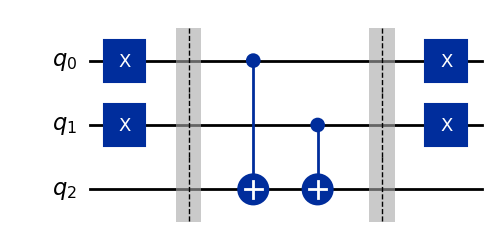

In [ ]:
balanced_oracle = QuantumCircuit(n+1)
b_str = "11"

# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

# Use barrier as divider
balanced_oracle.barrier()

# Controlled-NOT gates
for qubit in range(n):
    balanced_oracle.cx(qubit, n)

balanced_oracle.barrier()

# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

# Show oracle
balanced_oracle.draw('mpl')

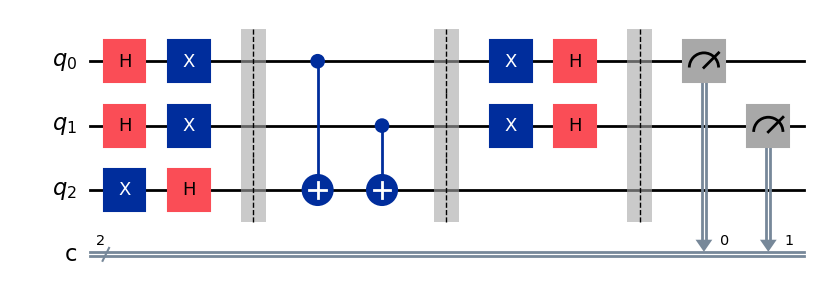

In [ ]:
# The Deutsch Jozsa  Full Quantum Circuit
dj_circuit = QuantumCircuit(n+1, n)

# Apply H-gates
for qubit in range(n):
    dj_circuit.h(qubit)

# Put qubit in state |->
dj_circuit.x(n)
dj_circuit.h(n)

# Add oracle
dj_circuit.compose(balanced_oracle, inplace=True)

# Repeat H-gates
for qubit in range(n):
    dj_circuit.h(qubit)
dj_circuit.barrier()

# Measure
for i in range(n):
    dj_circuit.measure(i, i)

# Display circuit
dj_circuit.draw('mpl')


Total counts are: {'11': 1024}


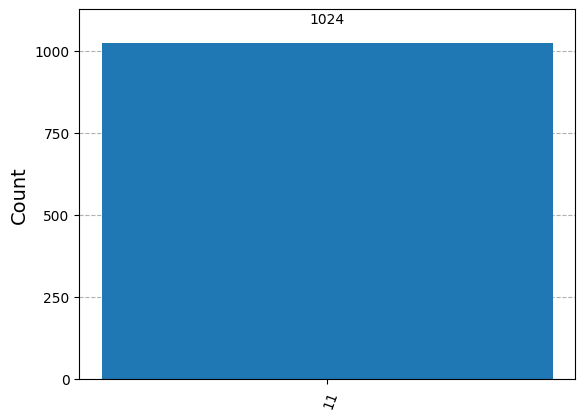

In [ ]:
# Test the Balanced Oracle

from qiskit import transpile

backend = Aer.get_backend('qasm_simulator')
compiled_circuit = transpile(dj_circuit, backend)

# Grab results from the job
result = backend.run(compiled_circuit).result()

# Returns counts
counts = result.get_counts(compiled_circuit)
print("\nTotal counts are:",counts)

# Plot a histogram
plot_histogram(counts)

## Balanced Oracle - General Function

In [ ]:
def dj_oracle_balanced(n):
    # We need to make a QuantumCircuit object to return
    # This circuit has n+1 qubits: the size of the input,
    # plus one output qubit
    oracle_qc = QuantumCircuit(n+1)

    # First generate a random number that tells us which CNOTs to
    # wrap in X-gates:
    b = np.random.randint(1,2**n)

    # Next, format 'b' as a binary string of length 'n', padded with zeros:
    b_str = format(b, '0'+str(n)+'b')

    # Next, we place the first X-gates. Each digit in our binary string
    # corresponds to a qubit, if the digit is 0, we do nothing, if it's 1
    # we apply an X-gate to that qubit:
    for qubit in range(len(b_str)):
        if b_str[qubit] == '1':
            oracle_qc.x(qubit)

    # Do the controlled-NOT gates for each qubit, using the output qubit
    # as the target:
    for qubit in range(n):
        oracle_qc.cx(qubit, n)

    # Next, place the final X-gates
    for qubit in range(len(b_str)):
        if b_str[qubit] == '1':
            oracle_qc.x(qubit)


    oracle_gate_balanced = oracle_qc.to_gate()
    oracle_gate_balanced.name = "Oracle Balanced" # To show when we display the circuit
    return oracle_gate_balanced

In [ ]:
def dj_algorithm(dj_oracle_balanced,n):
    dj_circuit = QuantumCircuit(n+1, n)
    # Set up the output qubit:
    dj_circuit.x(n)
    dj_circuit.h(n)
    # And set up the input register:
    for qubit in range(n):
        dj_circuit.h(qubit)
    # Let's append the oracle gate to our circuit:
    dj_circuit.append(dj_oracle_balanced, range(n+1))
    # Finally, perform the H-gates again and measure:
    for qubit in range(n):
        dj_circuit.h(qubit)

    for i in range(n):
        dj_circuit.measure(i, i)

    return dj_circuit

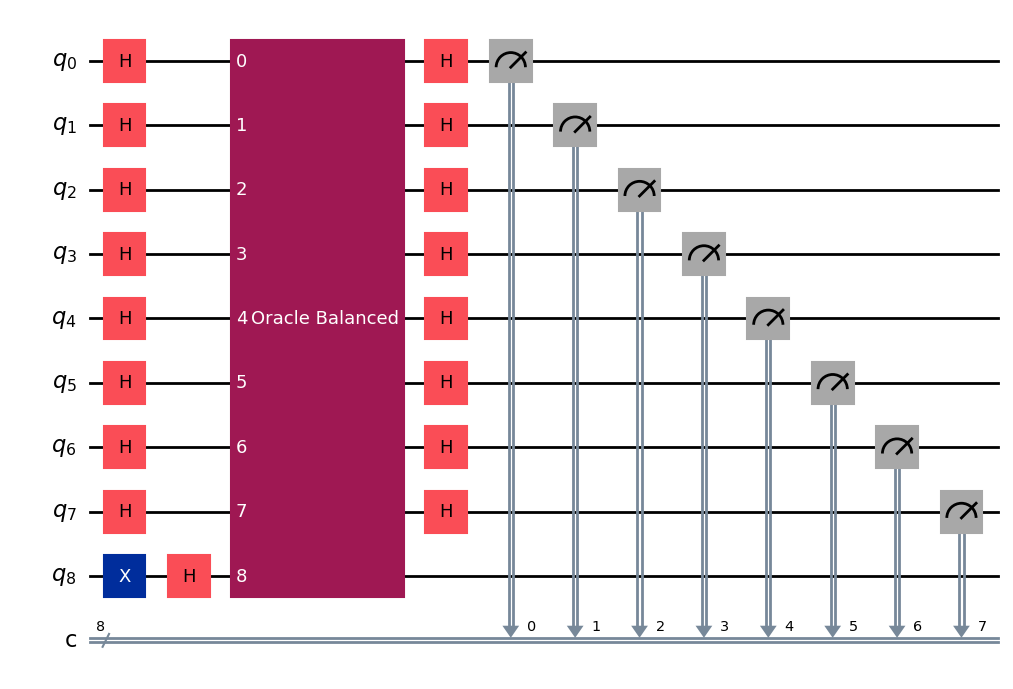

In [ ]:
n = 8
oracle_gate_balanced = dj_oracle_balanced(n)
dj_circuit = dj_algorithm(oracle_gate_balanced, n)
dj_circuit.draw('mpl')


Total counts are: {'11111111': 1024}


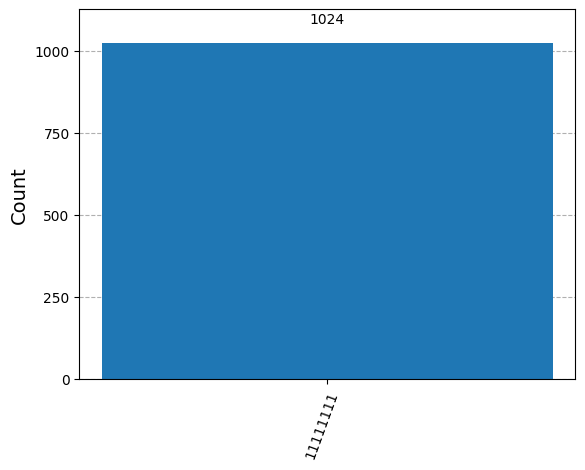

In [ ]:
# Test the Balanced Oracle - General Function

from qiskit import transpile

backend = Aer.get_backend('qasm_simulator')
compiled_circuit = transpile(dj_circuit, backend)

# Grab results from the job
result = backend.run(compiled_circuit).result()

# Returns counts
counts = result.get_counts(compiled_circuit)
print("\nTotal counts are:",counts)

# Plot a histogram
plot_histogram(counts)

## Both Constant and Balanced - General Function

In [ ]:
def dj_oracle(case, n):
    # We need to make a QuantumCircuit object to return
    # This circuit has n+1 qubits: the size of the input,
    # plus one output qubit
    oracle_qc = QuantumCircuit(n+1)

    # First, let's deal with the case in which oracle is balanced
    if case == "balanced":
        # First generate a random number that tells us which CNOTs to
        # wrap in X-gates:
        b = np.random.randint(1,2**n)
        # Next, format 'b' as a binary string of length 'n', padded with zeros:
        b_str = format(b, '0'+str(n)+'b')
        # Next, we place the first X-gates. Each digit in our binary string
        # corresponds to a qubit, if the digit is 0, we do nothing, if it's 1
        # we apply an X-gate to that qubit:
        for qubit in range(len(b_str)):
            if b_str[qubit] == '1':
                oracle_qc.x(qubit)
        # Do the controlled-NOT gates for each qubit, using the output qubit
        # as the target:
        for qubit in range(n):
            oracle_qc.cx(qubit, n)
        # Next, place the final X-gates
        for qubit in range(len(b_str)):
            if b_str[qubit] == '1':
                oracle_qc.x(qubit)

    # Case in which oracle is constant
    if case == "constant":
        # First decide what the fixed output of the oracle will be
        # (either always 0 or always 1)
        output = np.random.randint(2)
        if output == 1:
            oracle_qc.x(n)

    oracle_gate = oracle_qc.to_gate()
    oracle_gate.name = "Oracle" # To show when we display the circuit
    return oracle_gate

In [ ]:
def dj_algorithm(oracle, n):
    dj_circuit = QuantumCircuit(n+1, n)
    # Set up the output qubit:
    dj_circuit.x(n)
    dj_circuit.h(n)
    # And set up the input register:
    for qubit in range(n):
        dj_circuit.h(qubit)
    # Let's append the oracle gate to our circuit:
    dj_circuit.append(oracle, range(n+1))
    # Finally, perform the H-gates again and measure:
    for qubit in range(n):
        dj_circuit.h(qubit)

    for i in range(n):
        dj_circuit.measure(i, i)

    return dj_circuit


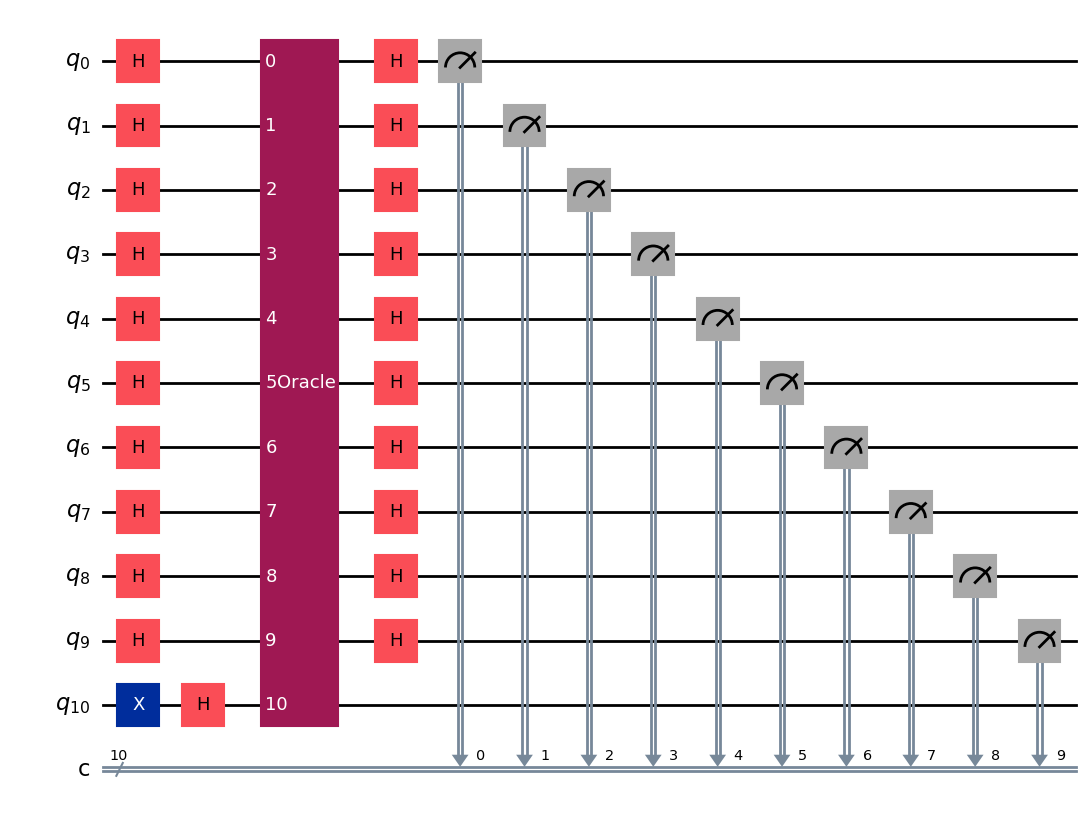

In [ ]:
n = 10
oracle_gate = dj_oracle('balanced', n)
dj_circuit = dj_algorithm(oracle_gate, n)
dj_circuit.draw('mpl')


Total counts are: {'1111111111': 1024}


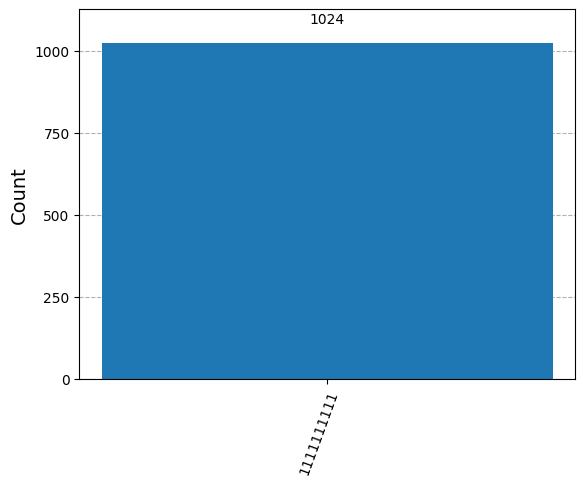

In [ ]:
# Test the Both Constant and Balanced Oracle - General Function

from qiskit import transpile

backend = Aer.get_backend('qasm_simulator')
compiled_circuit = transpile(dj_circuit, backend)

# Grab results from the job
result = backend.run(compiled_circuit).result()

# Returns counts
counts = result.get_counts(compiled_circuit)
print("\nTotal counts are:",counts)

# Plot a histogram
plot_histogram(counts)